In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

#imported all the necessary libraries

In [2]:
pwd

'C:\\Users\\HP'

In [3]:
#let view our dataset

df=pd.read_csv('diabetes.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Data_type')

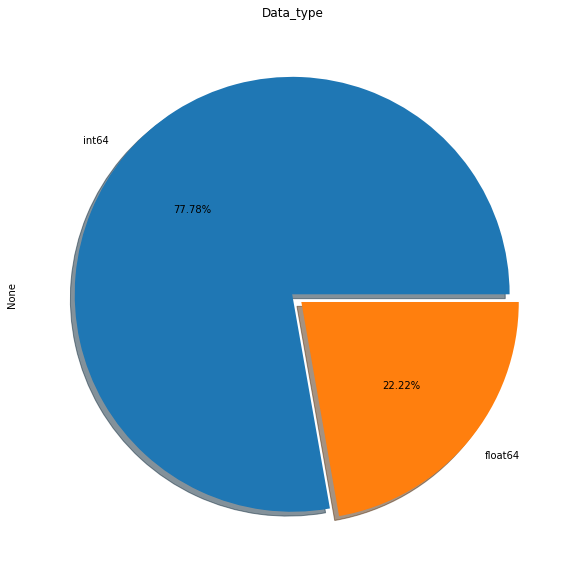

In [4]:
#LET CHECK FOR OUR DATA tYPE IN OUR COLUMNS


df.dtypes.value_counts().plot.pie(figsize=(10,10),shadow=True,explode=(0.005,0.05),autopct='%1.2f%%').set_title('Data_type')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# EDA

#BEFORRE DIVING DEEP INTO THE ANALYSIS LET IT BE KNOWN THAT 

1 MEANS YES    >>>>>>>>>
0 MEANS  NO

IN OTHER WORDS;
1 MEANS AFFECTED
0 MEANS NOT-AFFECTED

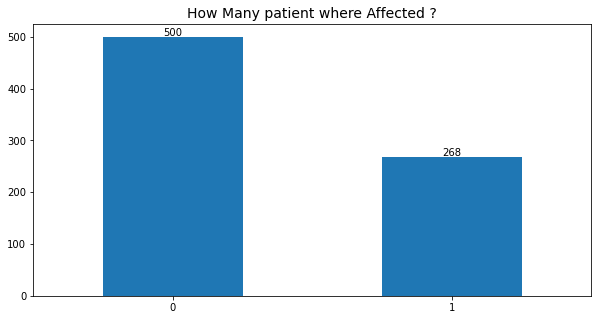

In [6]:
#first let check for All The patient affected


fig=df['Outcome'].value_counts().plot.bar(figsize=(10,5))
plt.title('How Many patient where Affected ?',fontsize=14)
plt.xticks(rotation=0);

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

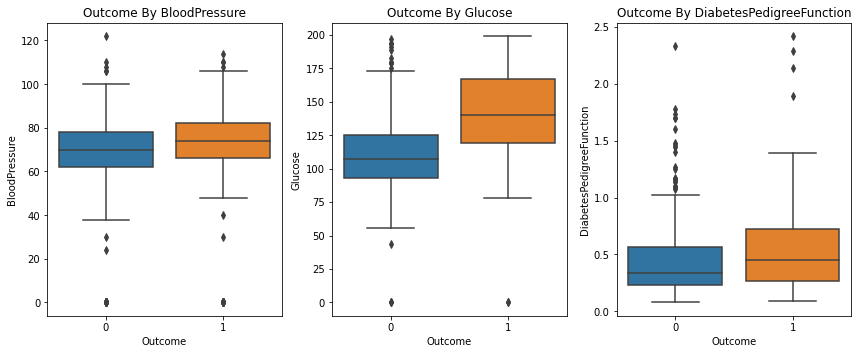

In [7]:
#Let check if the same pateint that are affected with INSULIN are also affected by Glocose LEVEL

fig,ax=plt.subplots(1,3,figsize=(12,5))

sns.boxplot(data=df,x='Outcome',y='BloodPressure', ax=ax[0])
ax[0].set_title('Outcome By BloodPressure')
fig.tight_layout(pad=1)

sns.boxplot(data=df,x='Outcome',y='Glucose',ax=ax[1])
ax[1].set_title('Outcome By Glucose')
fig.tight_layout(pad=1)

sns.boxplot(data=df,x='Outcome',y='DiabetesPedigreeFunction',ax=ax[2])
ax[2].set_title('Outcome By DiabetesPedigreeFunction')
fig.tight_layout(pad=1)

DiabetesPedigreeFunction visualization state that Patient patient who INHERIT DIABATICS FROM THEIR FAMILY are High

Glucose LeveL of the patient Every patient should be atleast within 90 to 125 that tell that your glucose level is that normal 
but if it exceeded that range then it a alarm for diabetes, which we have shown from our visualizaton that the patient who exceed the range are more than the one who are in range limit.

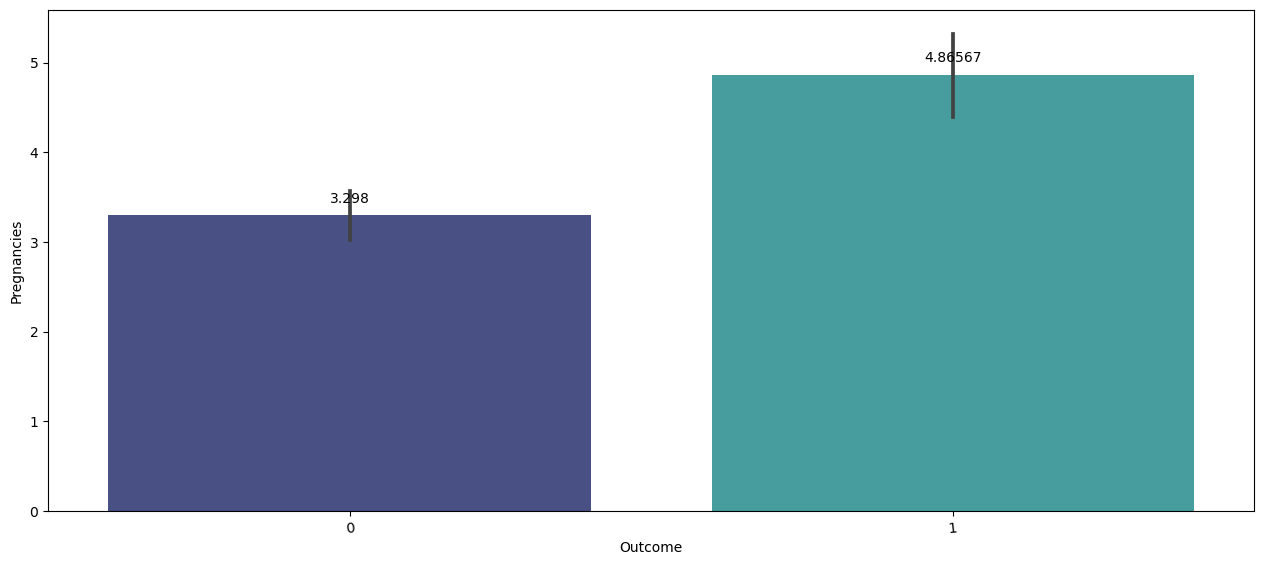

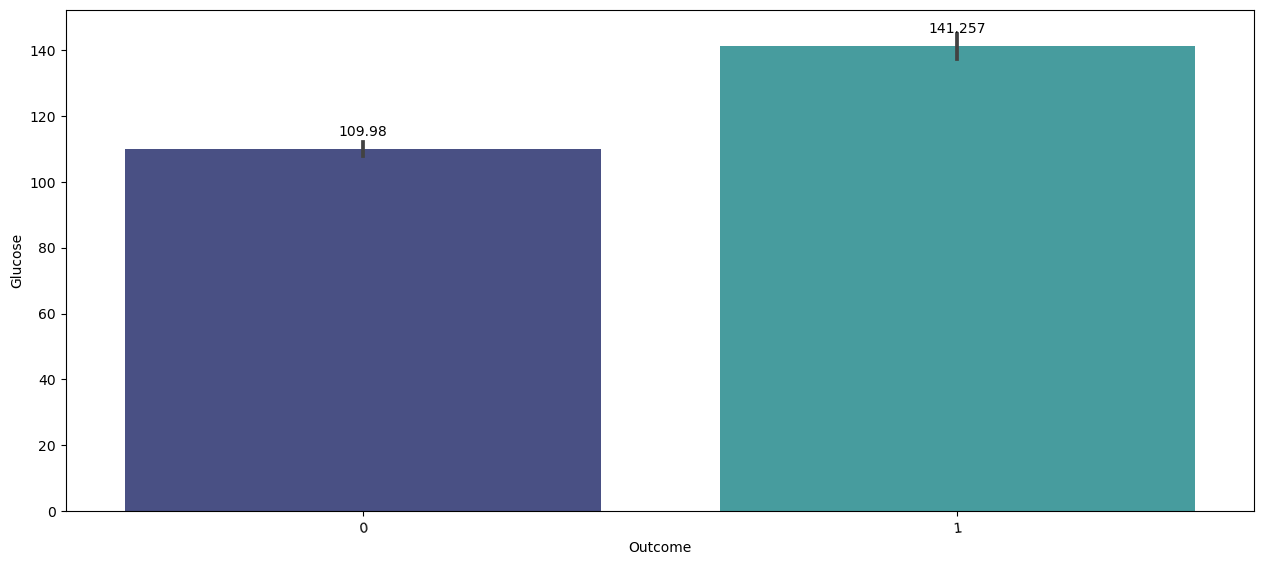

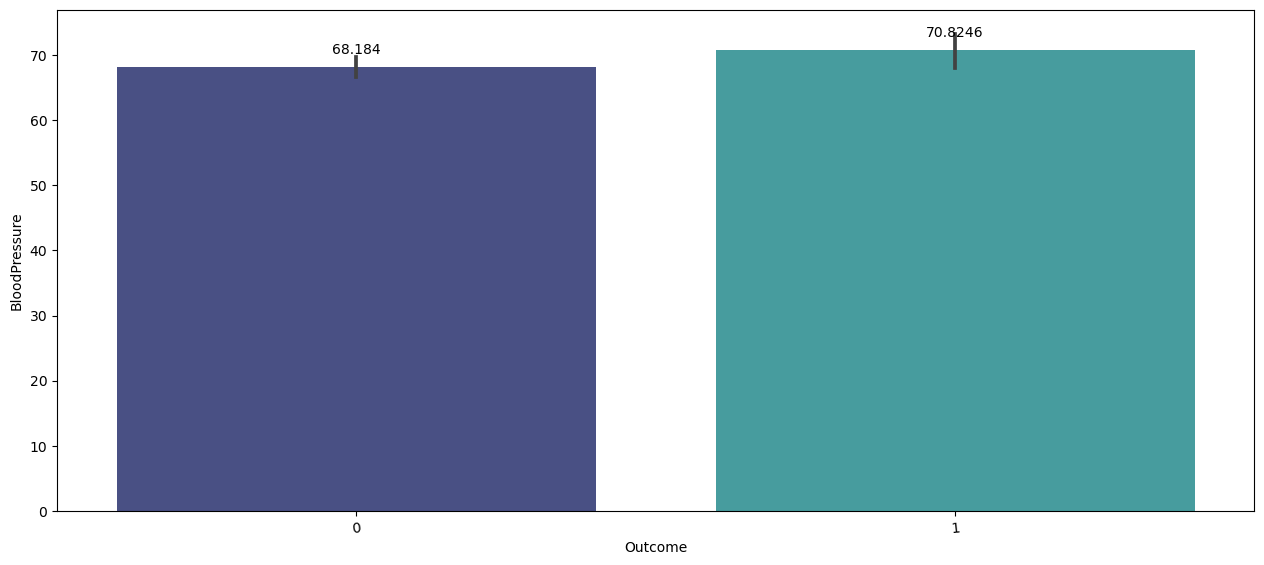

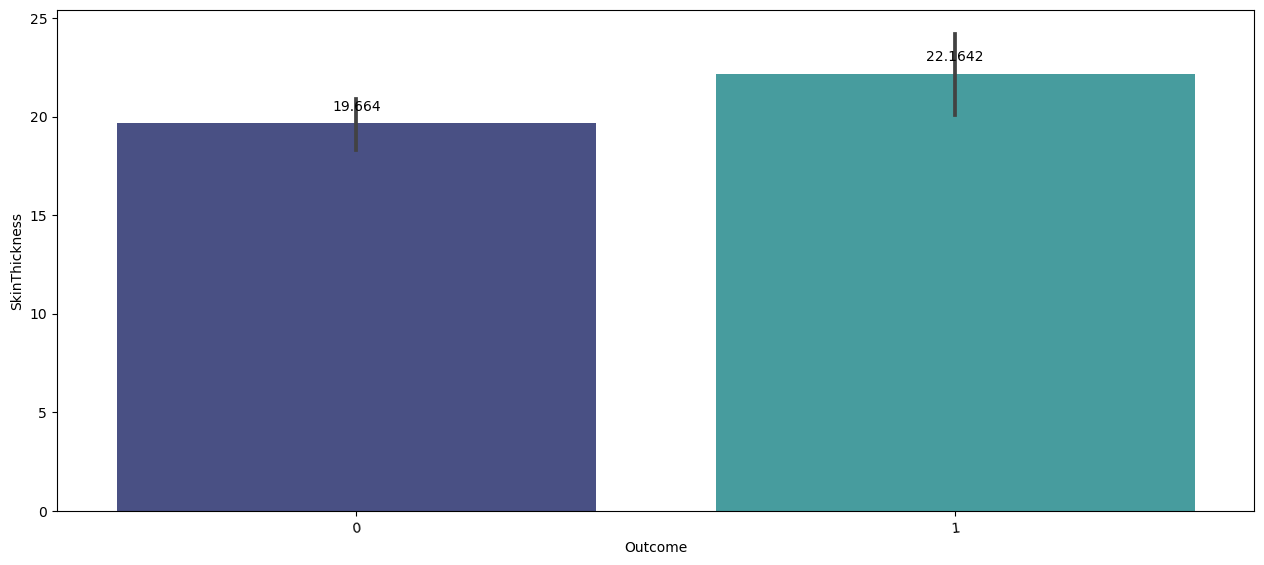

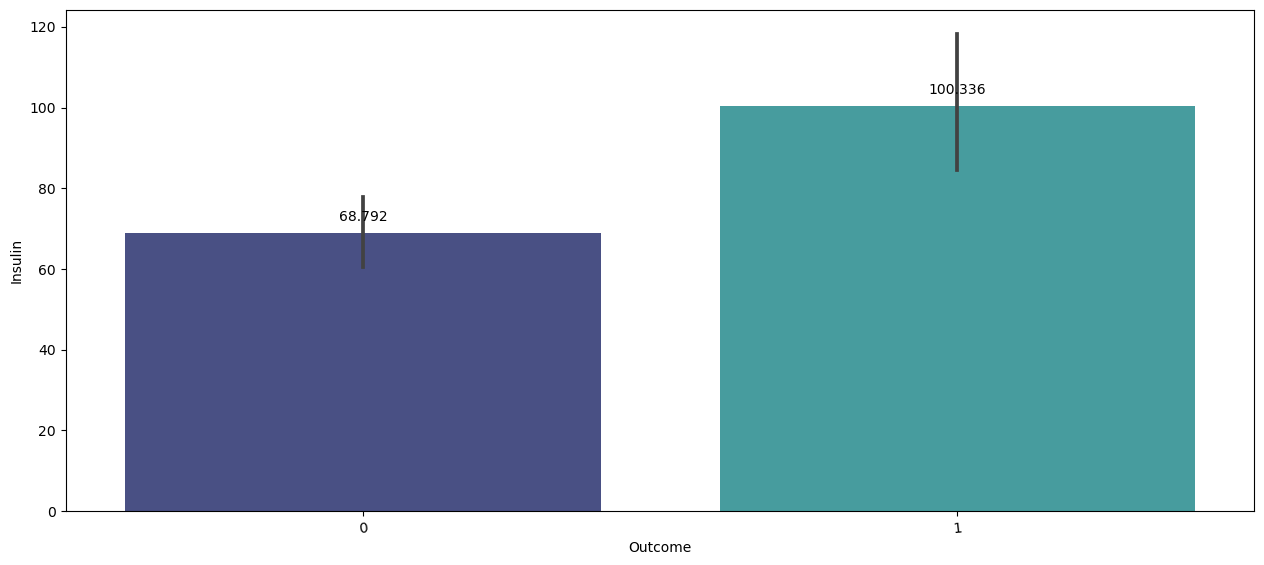

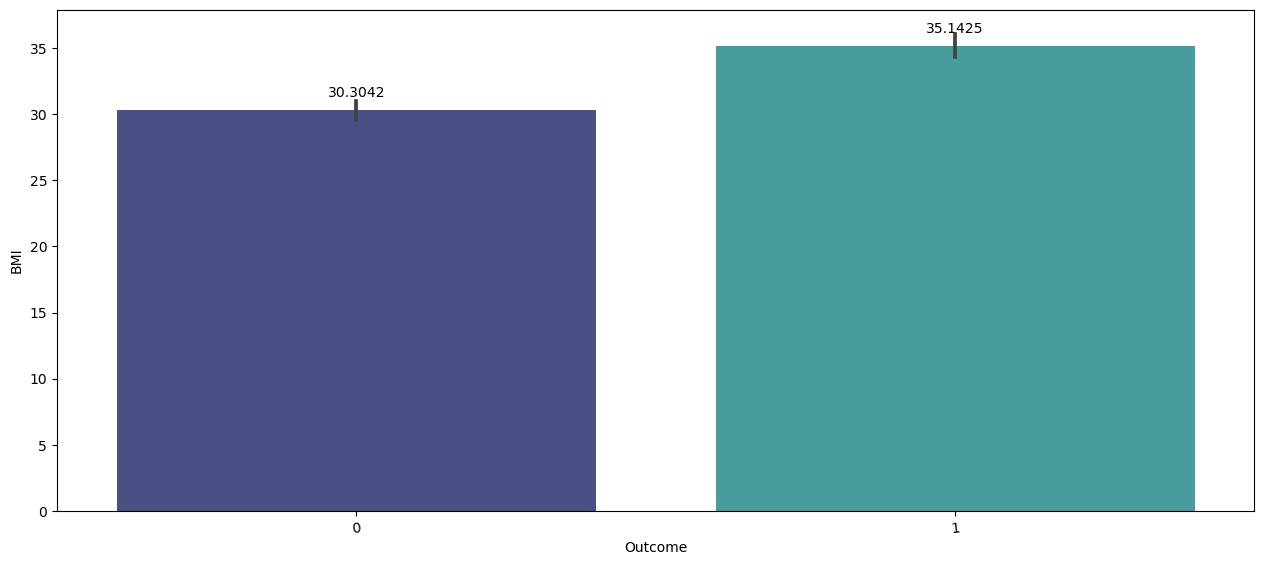

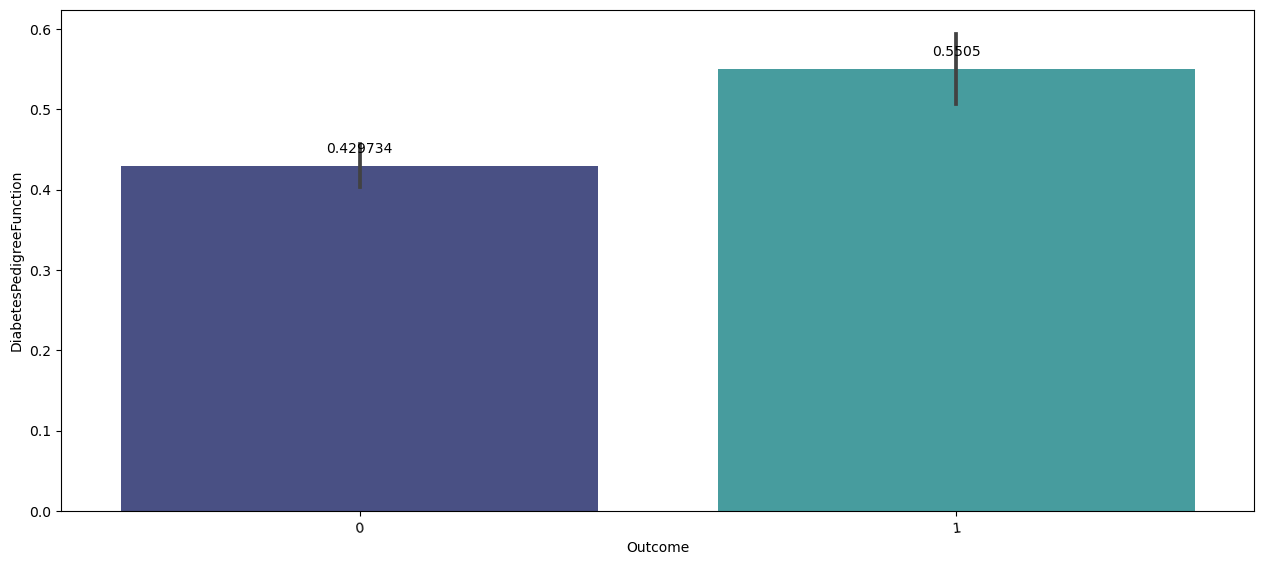

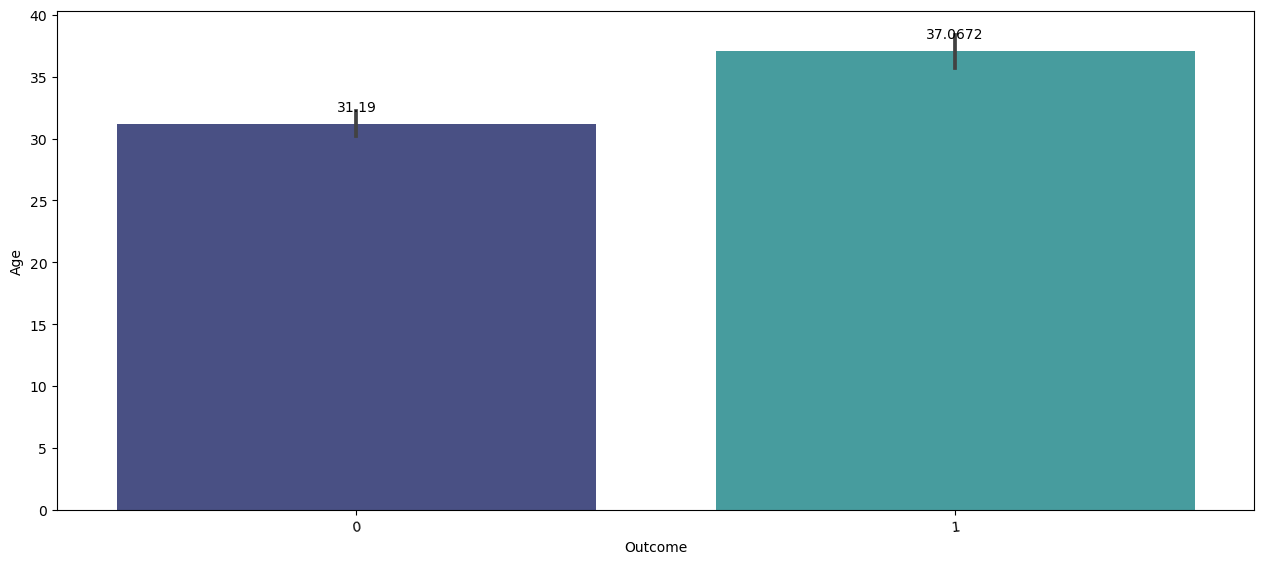

In [8]:
#haven't check for pregnancy let chck for other syndrome

for i,col in enumerate(df.drop(columns=['Outcome'],axis=1)):
    plt.figure(figsize=(13,6),dpi=100)
    fig=sns.barplot(data=df,x='Outcome',y=col,palette='mako')
    plt.tight_layout(pad=2)
    plt.xticks(rotation=5)
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=7)

In [9]:
#diving deep to those who are affected

Affected_people=df[df['Outcome']==1]

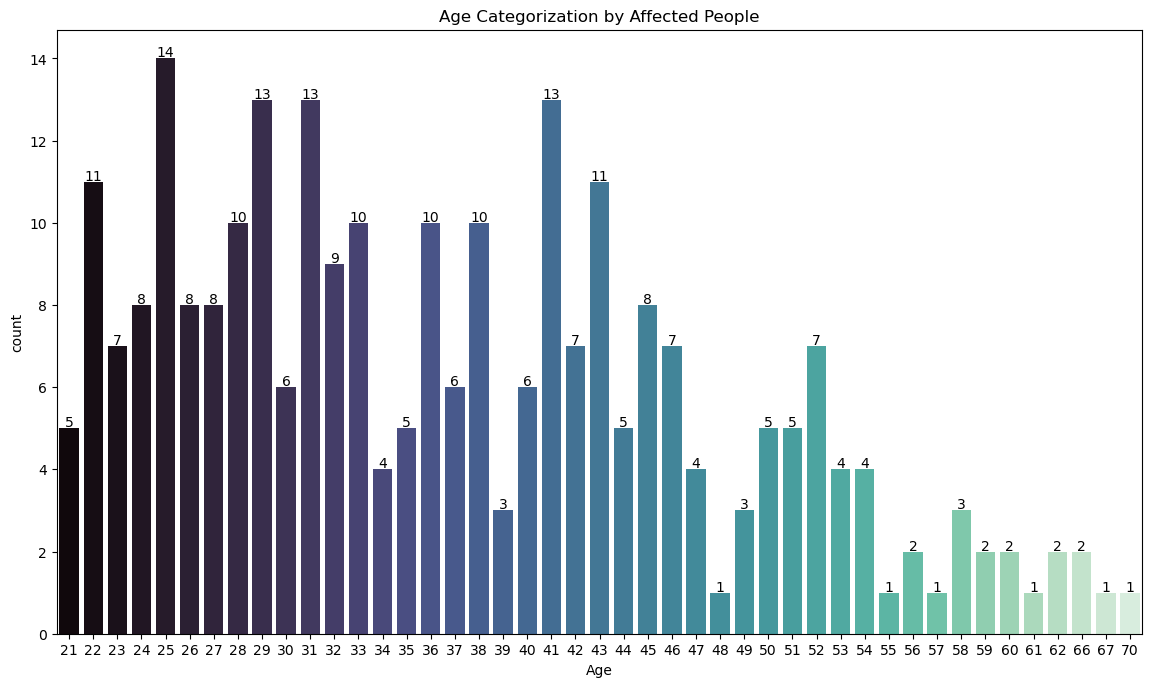

In [10]:
#for Purpose of clarification, i decide to categrize the Age, so as to KNOWN THE AGE range of age our Patient AND MANY PEOPLE are Affected.

plt.figure(figsize=(14,8),dpi=100)
fig=sns.countplot(data=Affected_people,x='Age',palette='mako')
plt.title('Age Categorization by Affected People')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

From The Visualization: The most Range Age that that are affceted are Age of 25.

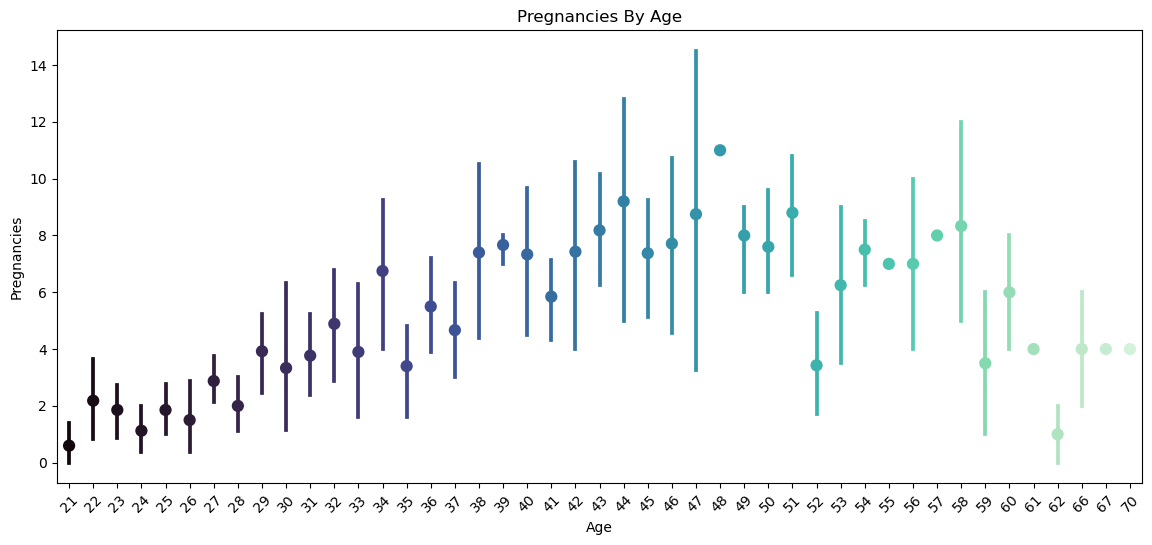

In [11]:
#Pregnancies Test Level

plt.figure(figsize=(14,6),dpi=100)
sns.pointplot(data=Affected_people,x='Age',y='Pregnancies',palette='mako')
plt.title('Pregnancies By Age')
plt.xticks(rotation=45);


In [12]:
print("AT THE AGE OF 48 PATIENT SEEMS TO BE MORE PREGNANT")

AT THE AGE OF 48 PATIENT SEEMS TO BE MORE PREGNANT


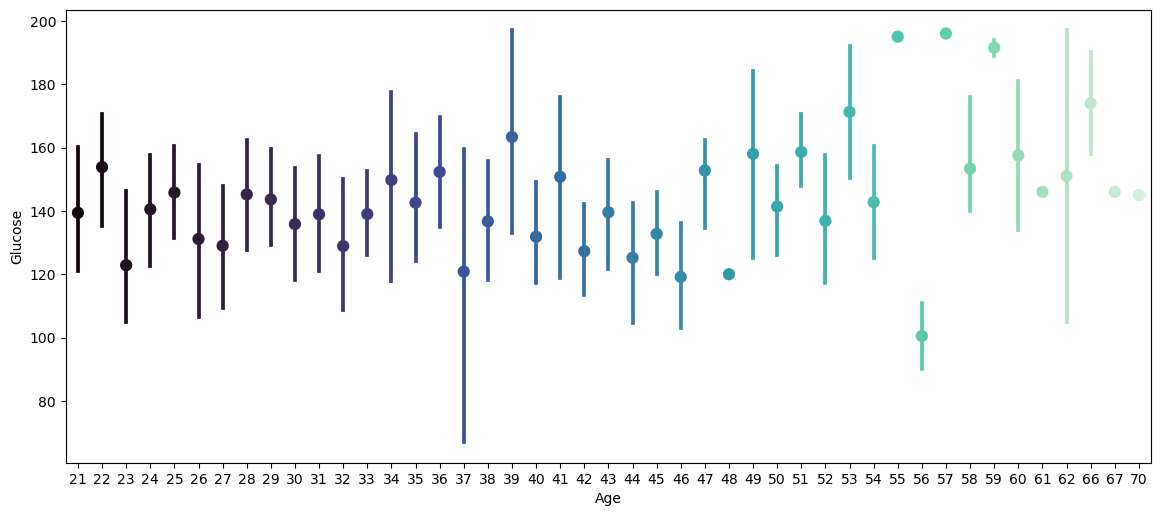

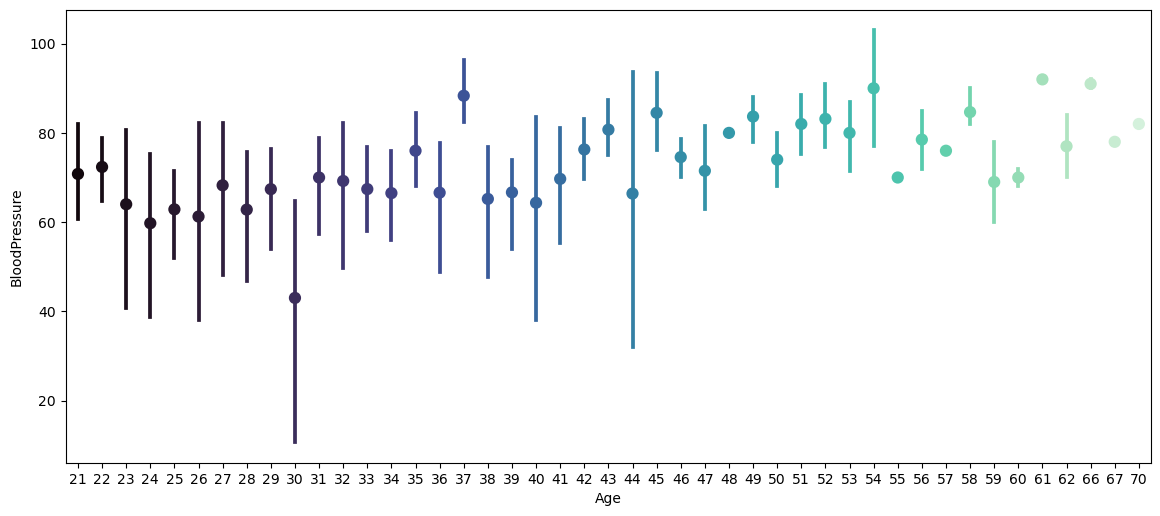

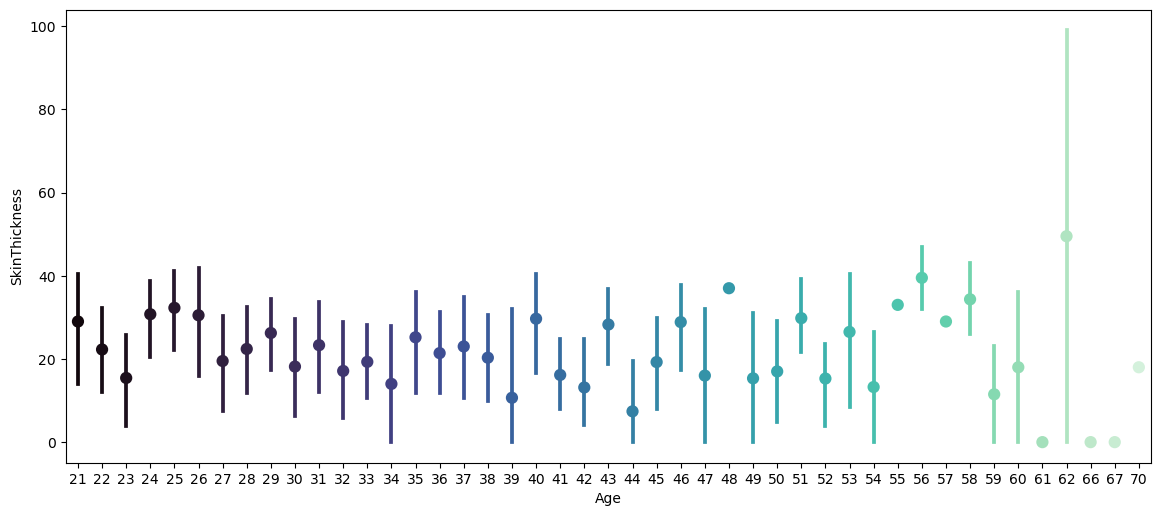

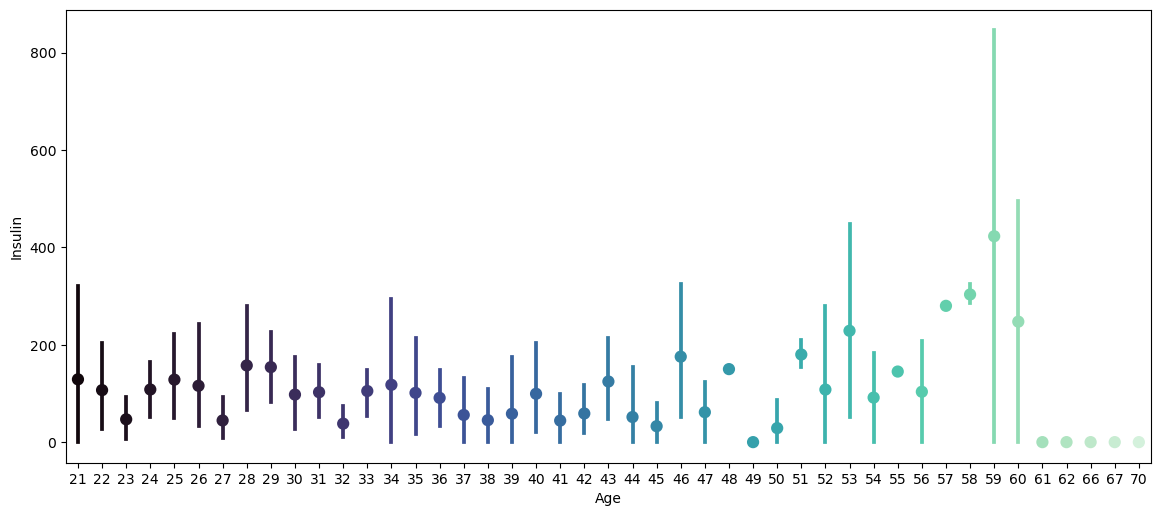

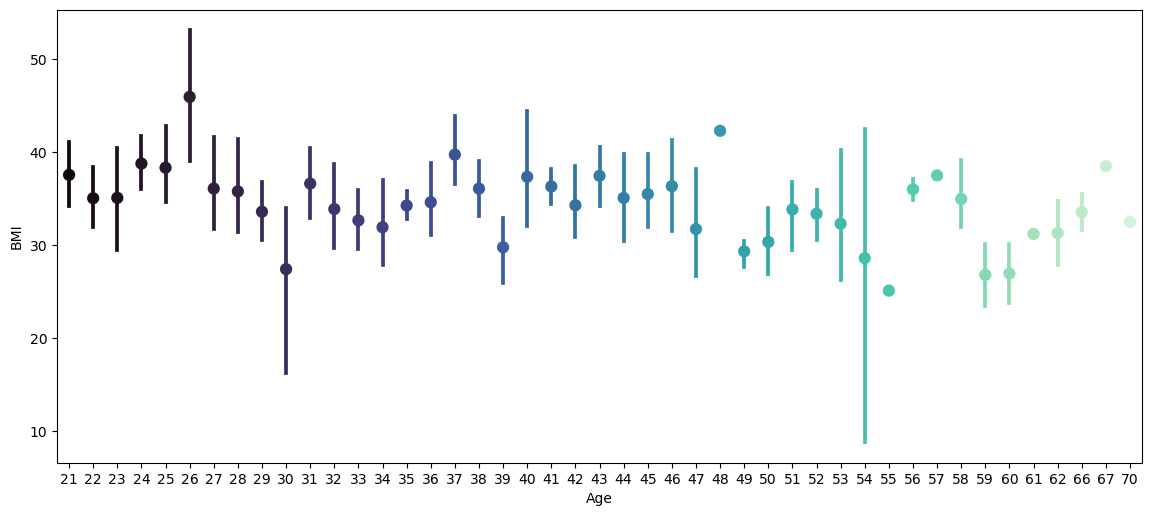

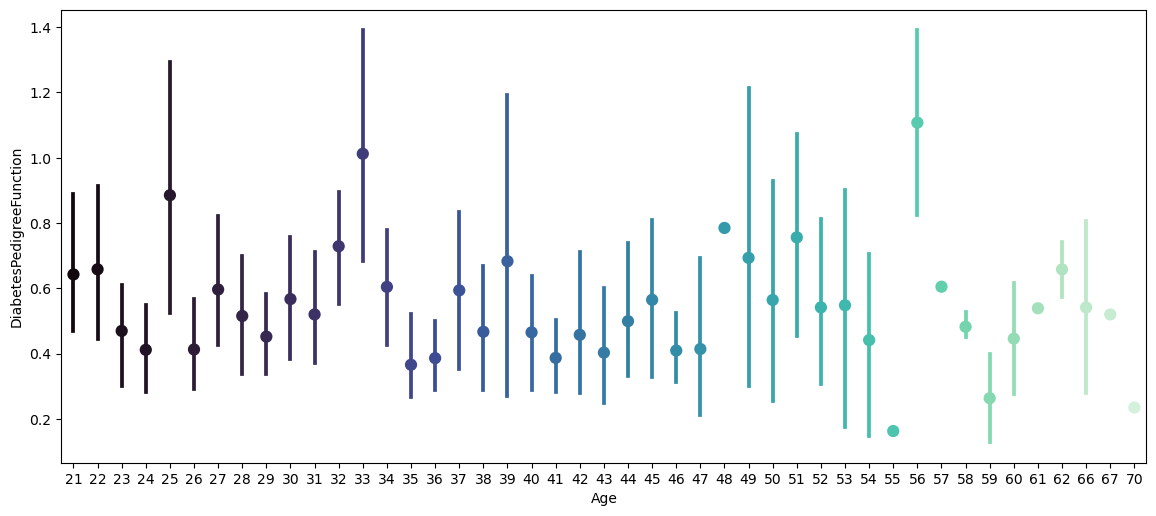

In [13]:
#haven't check for pregnancy let chck for other syndrome

for i,col in enumerate(Affected_people.drop(columns=['Outcome','Pregnancies','Age'],axis=1)):
    plt.figure(figsize=(14,6),dpi=100)
    sns.pointplot(data=Affected_people,x='Age',y=col,palette='mako')


From the Long Visualization :

    INSIGHT:
        
        💨 AGE(55,57,& 59 ) HAVE HIGHLEVEL OF GLUCOSE THAT EXCEEDED 180
        💨 mAJORITY OF THE PATIENT HAVE LESSER LEVEL OF BLOOD PRESSURES THAT RANGE BETWEEN (60-80 MMHG) AND THE REGULATORY BP
        IS WITHIN THE RANGE OF (80-120 MMGH),BUT LOWEST LEVEL OF BP ARE THE AGE OF 30 WHICH ARE ABOUT(6PEOPLE) WHO HAVE       LOWERLEVEL OF BLOOD PRESSURES.
        💨AGE (61-70) haven't TAKEN INSULIN, PATIENTS WHO ARE OF THE AGE OF 59(ABOUT 2 PEOPLE) HAVE TAKEEN LARGE AMOUNT OF INSULIN.
        💨BMI MEANING(BODY MASS INDEX) A REGULATORY BMI IS WITHIN (18.5-24.9) IF IT EXCEEDED THAT THAT IS EXCEESIVE
        FROM OUR VISUALIZATION ALL OF THE PATIENT ARE AFFECTED NO PATIENT OR AGE FALL UNDER THE REGULATORY LIMIT.
        💨 THE TOP 3 HIGHEST SCORE OF THE DIABETICS FUNCTIONS ARE AGE(25,33 & 48)

In [14]:
#let check for THOSE WHO AIN'T AFFECTED...

Not_Affected=df[df['Outcome']==0]

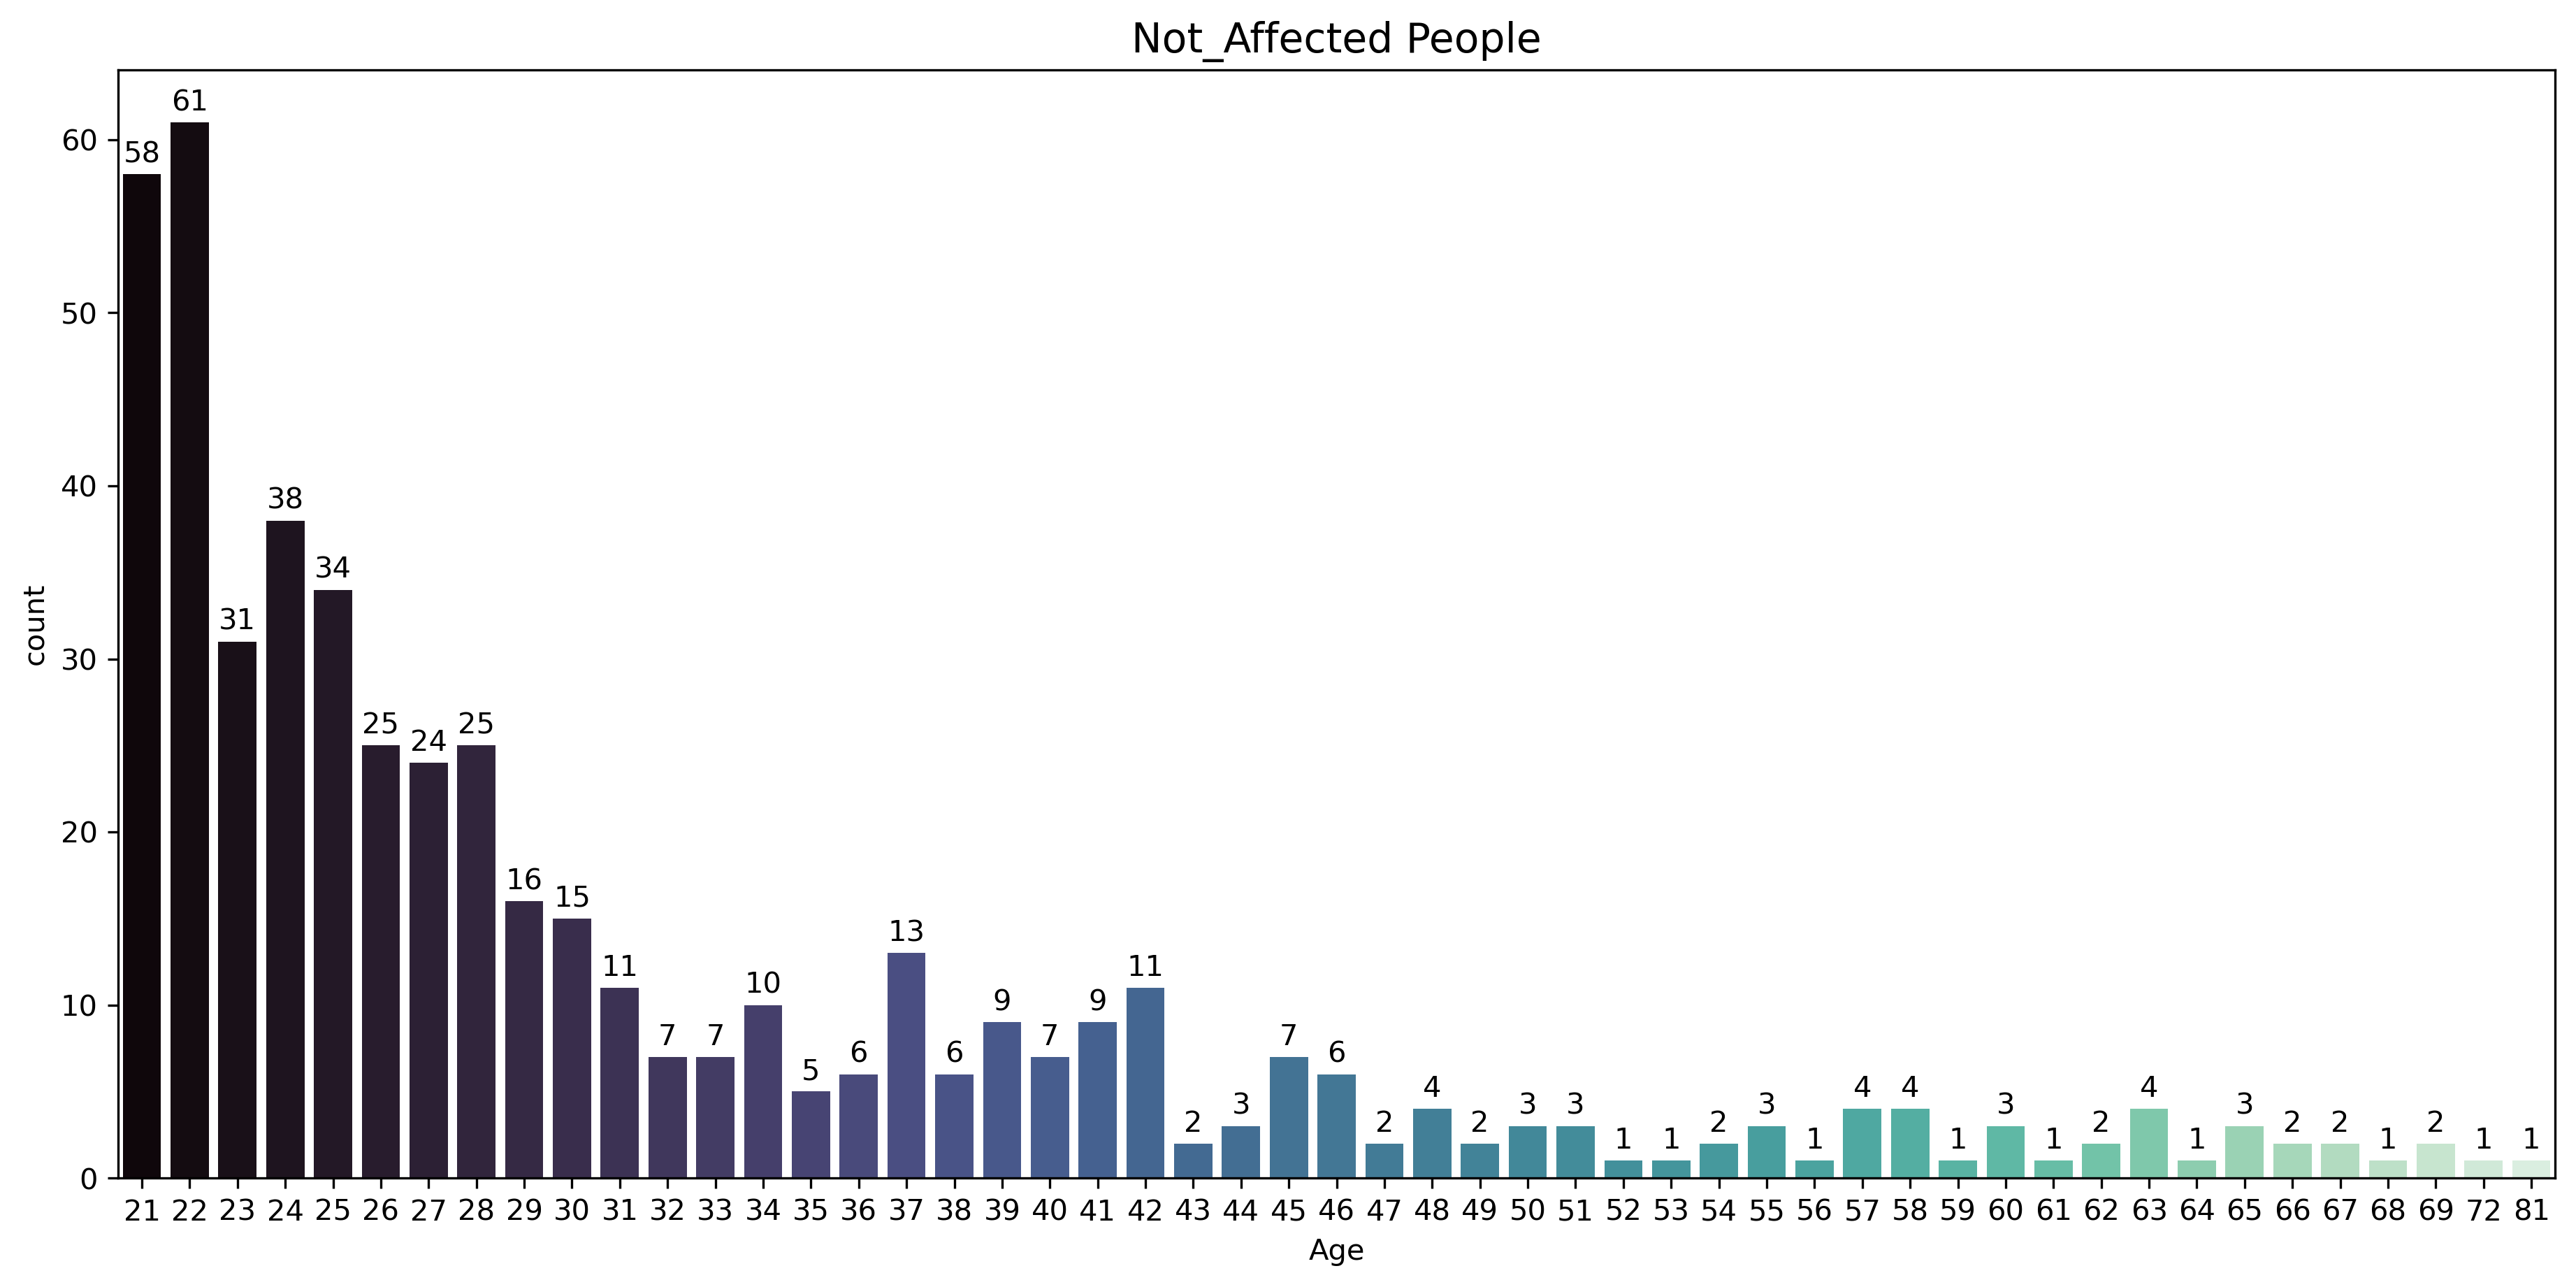

In [15]:
#let check the level of SkinThickness

plt.figure(figsize=(15,7),dpi=300)
fig=sns.countplot(data=Not_Affected,x='Age',palette='mako')
plt.title('Not_Affected People',fontsize=14)

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=2)

Waoh!!!

we have not NOT_AFFECTED people 81 Years of AGE 🤯🤯🤯

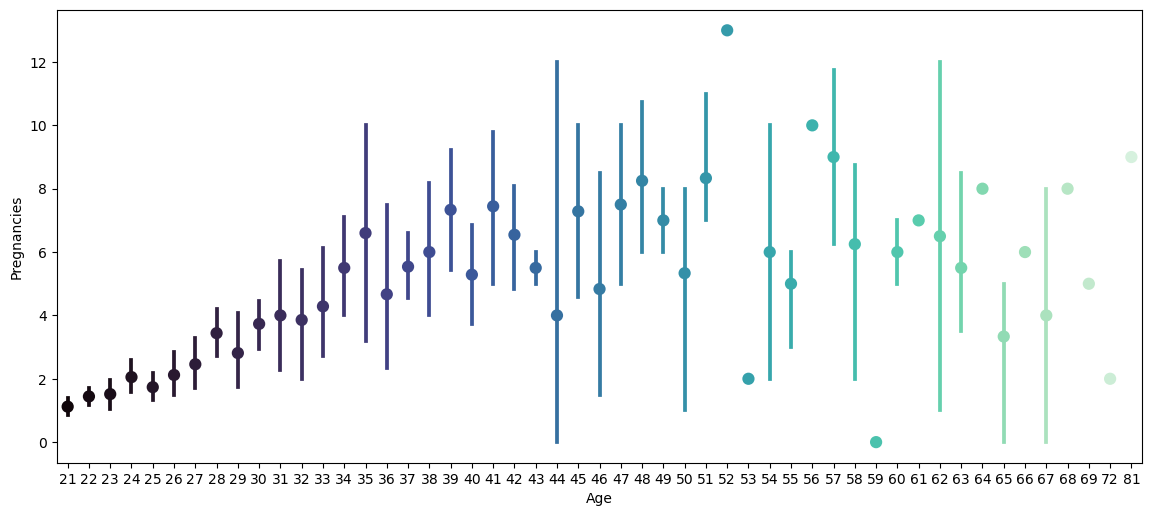

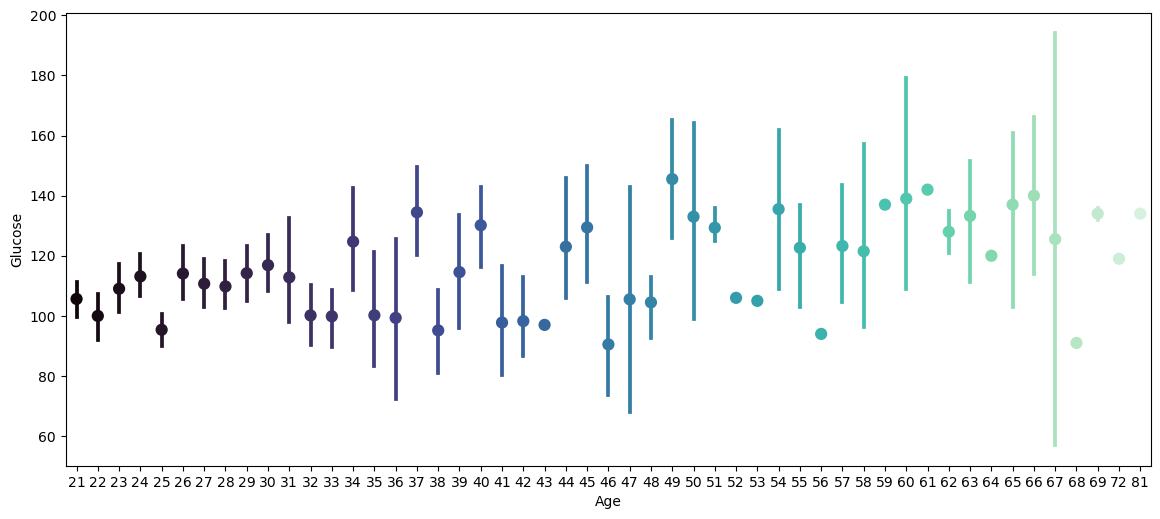

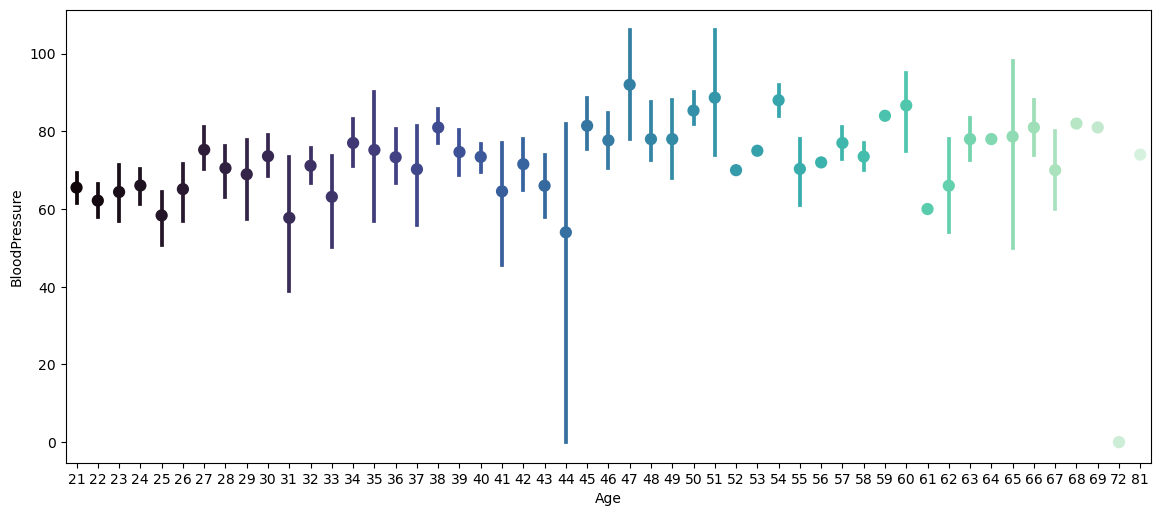

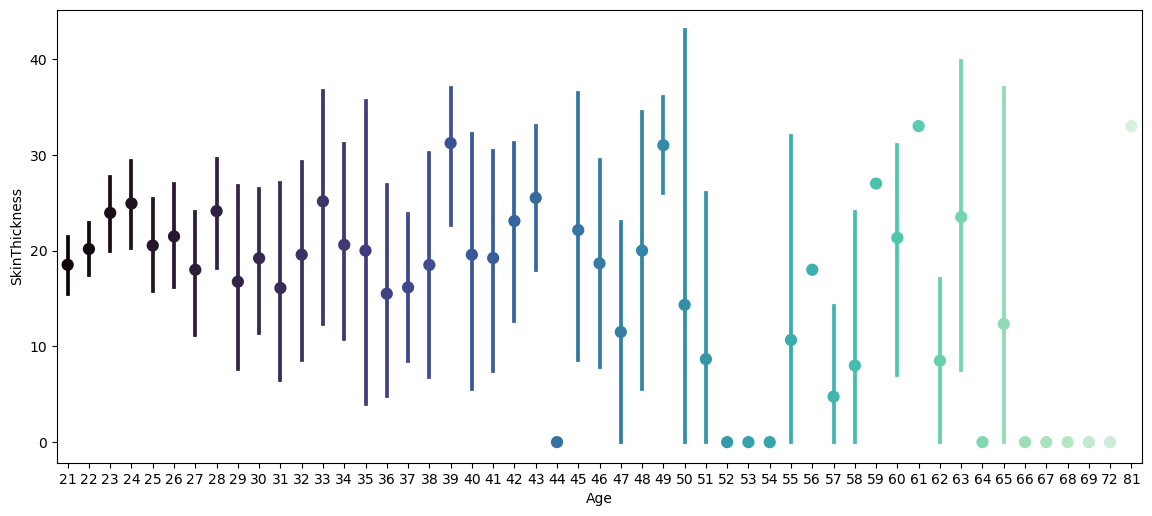

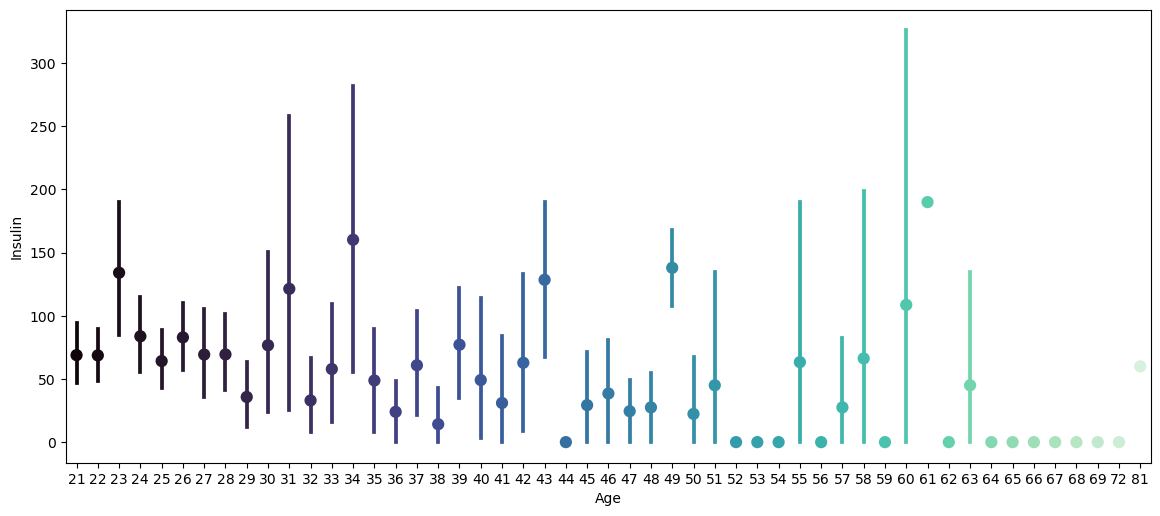

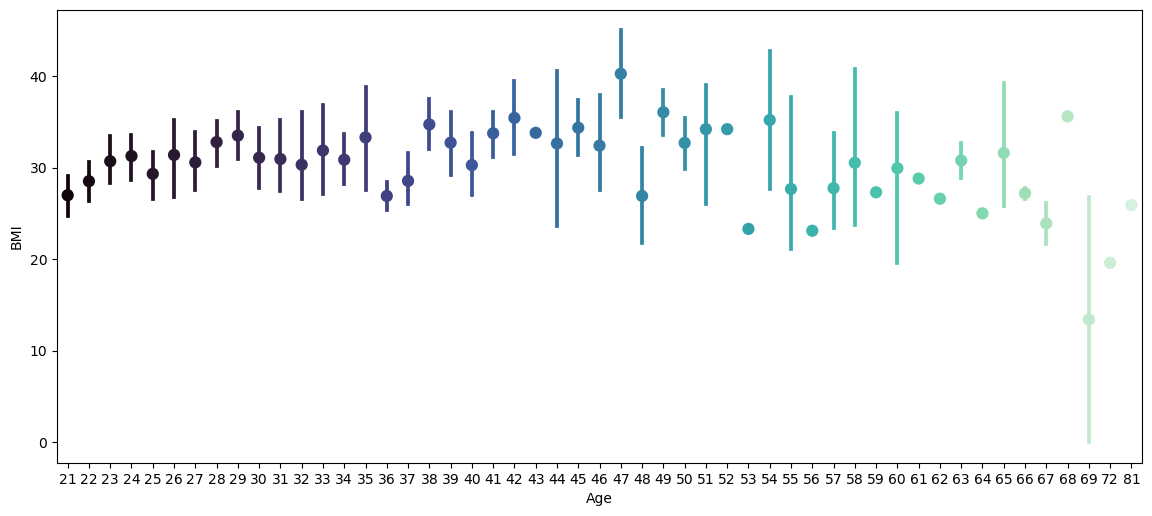

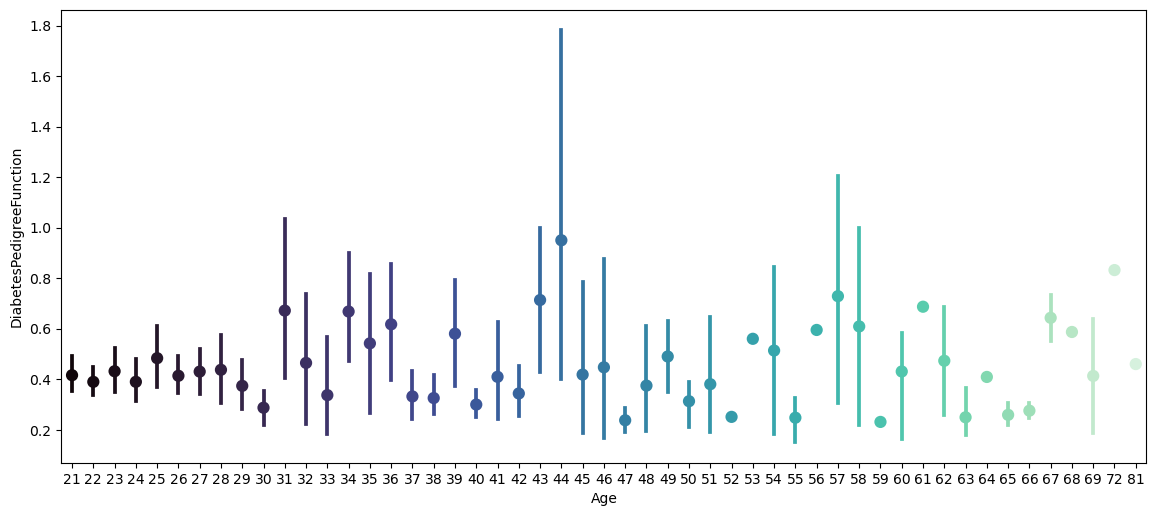

In [16]:
#haven't check for pregnancy let chck for other syndrome

for i,col in enumerate(Not_Affected.drop(columns=['Outcome','Age'],axis=1)):
    plt.figure(figsize=(14,6),dpi=100)
    sns.pointplot(data=Not_Affected,x='Age',y=col,palette='mako')

From the Long Visualization :

    INSIGHT:
        
        💨 UNLIKE THE AFFECTED PEOPLE WHOSE GLUCOSE LEVEL WAS BETWEEN(160-200),THE NON_AFFECTED PEOPLE MAINTAIN THE PARADIGM OF (85-140)WHICH CAN TILL BE CONTROLLED.
        💨 THE NOT_AFFECTED PATIENT ALSO HAVE LESSER LEVEL OF BLOOD PRESSURES THAT RANGE BETWEEN (60-80 MMHG) AND THE REGULATORY BP
        IS WITHIN THE RANGE OF (80-120 MMGH),BUT WE HAVE ONLY 47 YEARS OF AGE WHICH ARE (2 PEOPLE) THAT DON'T HAVE BP
        💨AGE (61,31,49) HAVE HIGH LEVEL OF INSULIN TO REGULATE THE SUGAR/GLUCOSE LEVEL
        💨BMI MEANING(BODY MASS INDEX) A REGULATORY BMI IS WITHIN (18.5-24.9) IF IT EXCEEDED THAT THAT IS EXCEESIVE
        FROM OUR VISUALIZATION ALL OF THE PATIENT ALSO ARE AFFECTED ONLY FEW PATIENT OR AGE DID NOT EXCEED THE LIMIT RAGE.
        💨 THE TOP SCORE OF DIABETICSPIDEGRESS FUNCTIONS PATIENT IS ABOUT(3 PEOPLE) WHICH WITHIN THE AGE OF 44.

In [17]:
#LET  VIEW OOUR TABLE

df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


LET MOVE TO LOGISTICS REGRESSION

In [18]:
# OUR tARGET vARIABLE IS OUTCOME WHY THE REST ARE OUR FEATURES.
#BUT FOR ASSIGNING LET CHECK FOR COLUMNS CORRELATION

df.corr().style.background_gradient(cmap='mako')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#few negative correlation
#more of positive correlation
#and NO strong relation , i think we re good to go

In [19]:
#we assigning 

X=df.drop('Outcome',axis=1)

y=df['Outcome']

In [20]:
#we will importing model_selection we will be using to train our model


from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scalerXtest=scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train,y_train)

LogisticRegression()

In [28]:
test_preidict=model.predict(scalerXtest)

In [29]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,plot_precision_recall_curve,plot_roc_curve

In [30]:
accuracy_score(y_test,test_preidict)

0.7987012987012987

In [31]:
#Am not satisfy with the result,let used CROSS VALIDATION
#LET RETRAIN OUR DATA SET

from sklearn.model_selection import train_test_split

In [32]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.2, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scl=StandardScaler()

In [36]:
scl.fit(X_train)
X_train=scl.transform(X_train)
scalXtest=scl.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
mymodel=LogisticRegression()

In [39]:
mymodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
test_pred=mymodel.predict(scalXtest)

In [41]:
accuracy_score(y_test,test_pred)

0.8709677419354839

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.80      0.80      0.80        10

    accuracy                           0.87        31
   macro avg       0.85      0.85      0.85        31
weighted avg       0.87      0.87      0.87        31



In [44]:
confusion_matrix(y_test,test_pred)

array([[19,  2],
       [ 2,  8]], dtype=int64)

#the model accurancy looks better this time but not satisfy

#let try something different may be another model,

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
modl=KNeighborsClassifier(n_neighbors=5)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.1, random_state=101)

In [49]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [50]:
modl.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
pred=modl.predict(X_test)

In [52]:
accuracy_score(y_test,pred)

0.7435897435897436

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

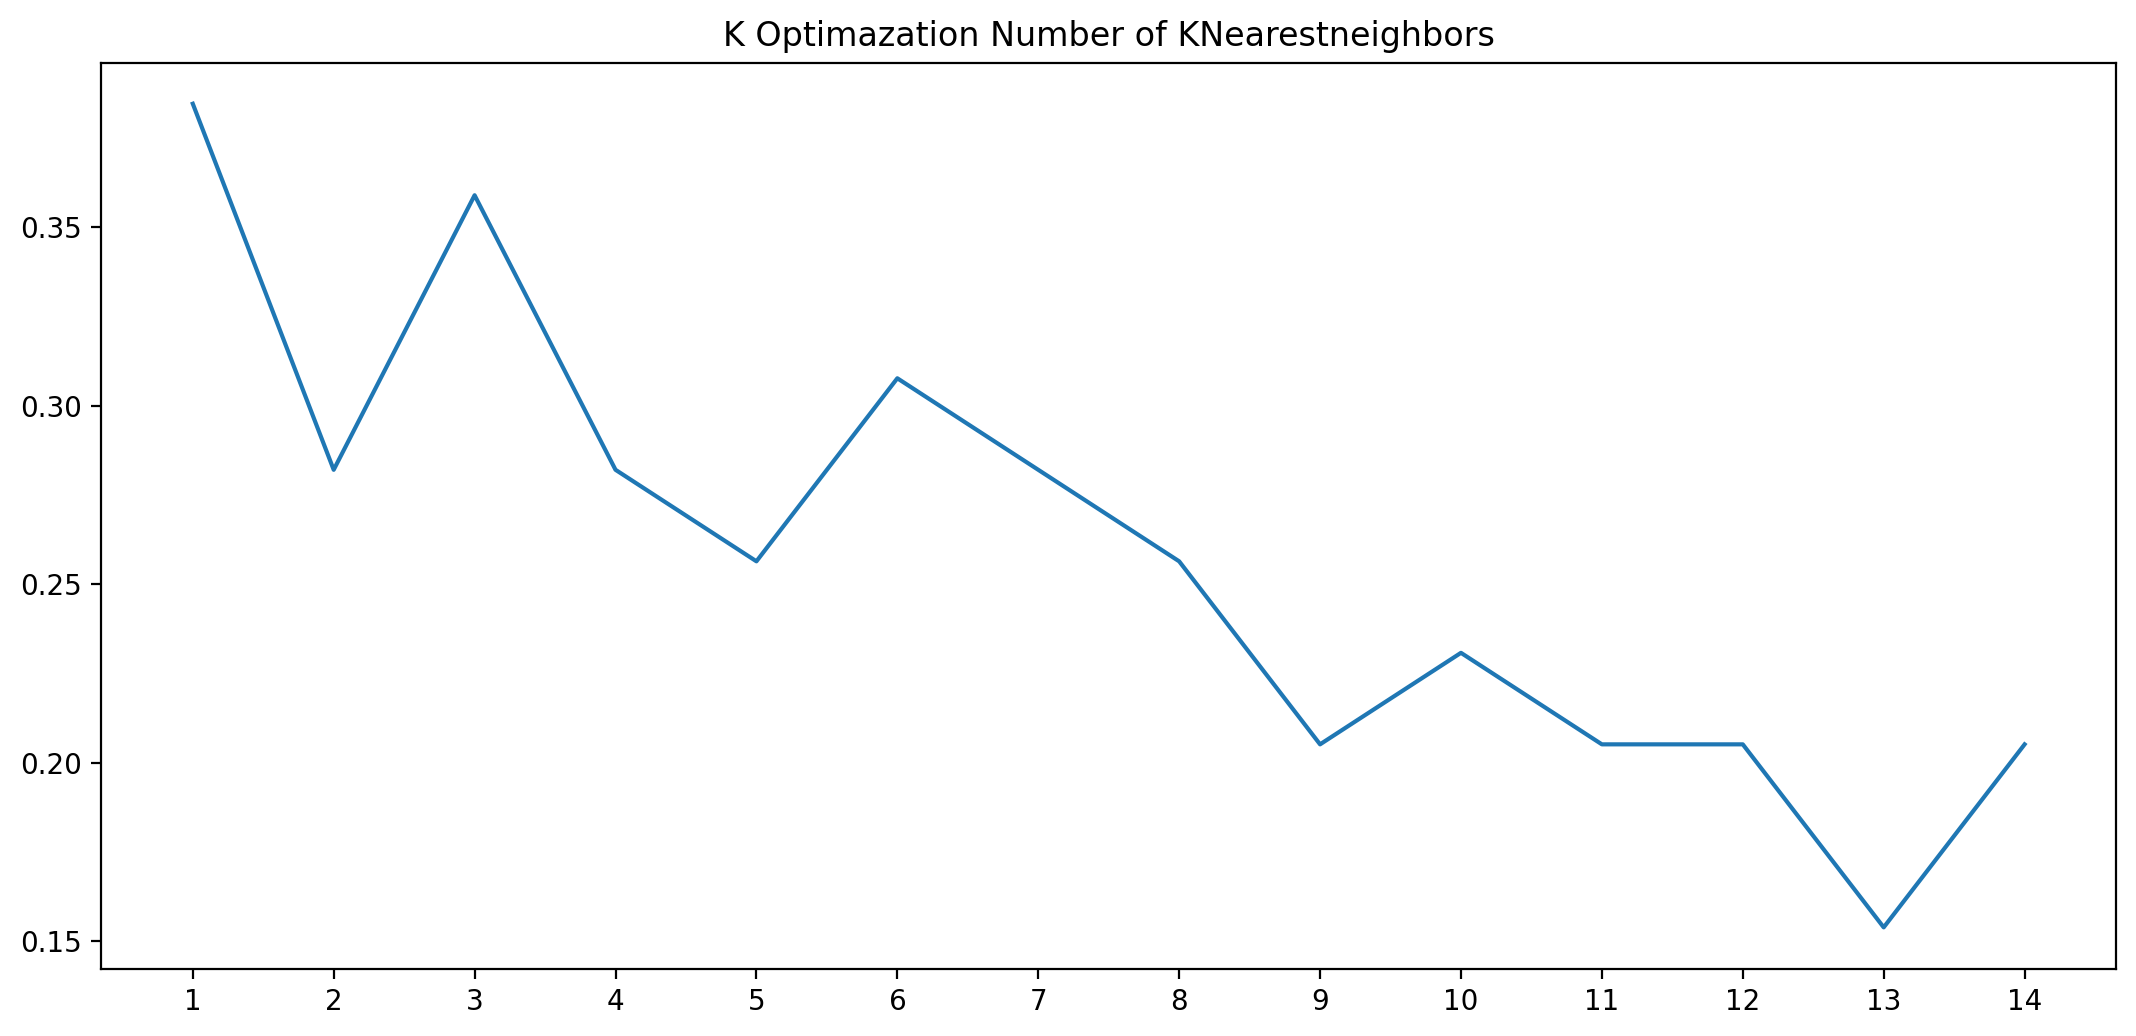

In [54]:
#let turn
K_range=range(1,15)
MSE=[]

for k in K_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train,y_train)
    MSE.append(mean_squared_error(y_test,Knn.predict(X_test)))
    
plt.figure(figsize=(13,6),dpi=200)
plt.title('K Optimazation Number of KNearestneighbors')
plt.xticks(np.arange(min(K_range),max(K_range)+1,1.0))
plt.plot(K_range,MSE)

In [55]:
#the lowest no. is 9,so therefore our K=13,
#let acrry them out.

from sklearn.neighbors import KNeighborsClassifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.33, random_state=101)

In [58]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [59]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
test_pr=knn.predict(X_test)
accuracy_score(y_test,test_pr)

0.7086614173228346

let go used another mmodel 
i will be using support vector machine learning 

In [60]:
#Again, we go all over it 

from sklearn.svm import SVC

In [61]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [63]:
mmodel=SVC()

In [64]:
mmodel.fit(X_train,y_train)

SVC()

In [65]:
y_pred=mmodel.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.7672413793103449

#this didn't give us what we want
#we used another model Decision tree making

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
trees=DecisionTreeClassifier()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [70]:
trees.fit(X_train,y_train)
y_predd=trees.predict(X_test)
accurancy_score=accuracy_score(y_test,y_predd)


In [71]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.2, random_state=101)

In [72]:
X_eval, X_test, y_eval, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
tre=DecisionTreeClassifier()

In [75]:
tre.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
test=tre.predict(X_test)
accuracy_score=accuracy_score(y_test,test)

OUT OF FOUR MODEL WE GAT TWO THAT GAVE US WHAT WE WANT.
this Best iteration of was DECISIONTREECLASSIFIER AND LOGISITCS MODEL ITSELF.

In [77]:
print('Our Decision Model Accuracy scores is:{:.2f}%'.format(accuracy_score*100))

Our Decision Model Accuracy scores is:87.50%
